<a href="https://colab.research.google.com/github/SAQUIBZEYA/ML_Project/blob/master/TV_shows_on_Netflix%2C_Prime_Video%2C_Hulu_and_Disney%2B_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data preparation

In [0]:
data=pd.read_csv("/content/datasets_674388_1186156_tv_shows.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [4]:
#shape of the datasets

data.shape

(5611, 11)

In [5]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [6]:
data.tail()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
5606,5606,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
5607,5607,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
5608,5608,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1
5609,5609,Love & Vets,2017,NaN,NaN,NaN,0,0,0,1,1
5610,5610,United States of Animals,2016,NaN,NaN,NaN,0,0,0,1,1


In [7]:
data.size

61721

In [8]:
data.axes

[RangeIndex(start=0, stop=5611, step=1),
 Index(['Unnamed: 0', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes',
        'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'type'],
       dtype='object')]

In [9]:
dt=data.values
dt[0]

array([0, 'Breaking Bad', 2008, '18+', 9.5, '96%', 1, 0, 0, 0, 1],
      dtype=object)

Starting Analysis of Data

In [10]:
print("Tv shows on netflix:",data['Netflix'].sum(),'/',data['Netflix'].count())
print("Tv shows on Prime Video:",data['Prime Video'].sum(),'/',data['Prime Video'].count())
print("Tv shows on Hulu:",data['Hulu'].sum(),'/',data['Hulu'].count())
print("Tv shows on Disney+:",data['Disney+'].sum(),'/',data['Disney+'].count())

Tv shows on netflix: 1931 / 5611
Tv shows on Prime Video: 2144 / 5611
Tv shows on Hulu: 1754 / 5611
Tv shows on Disney+: 180 / 5611


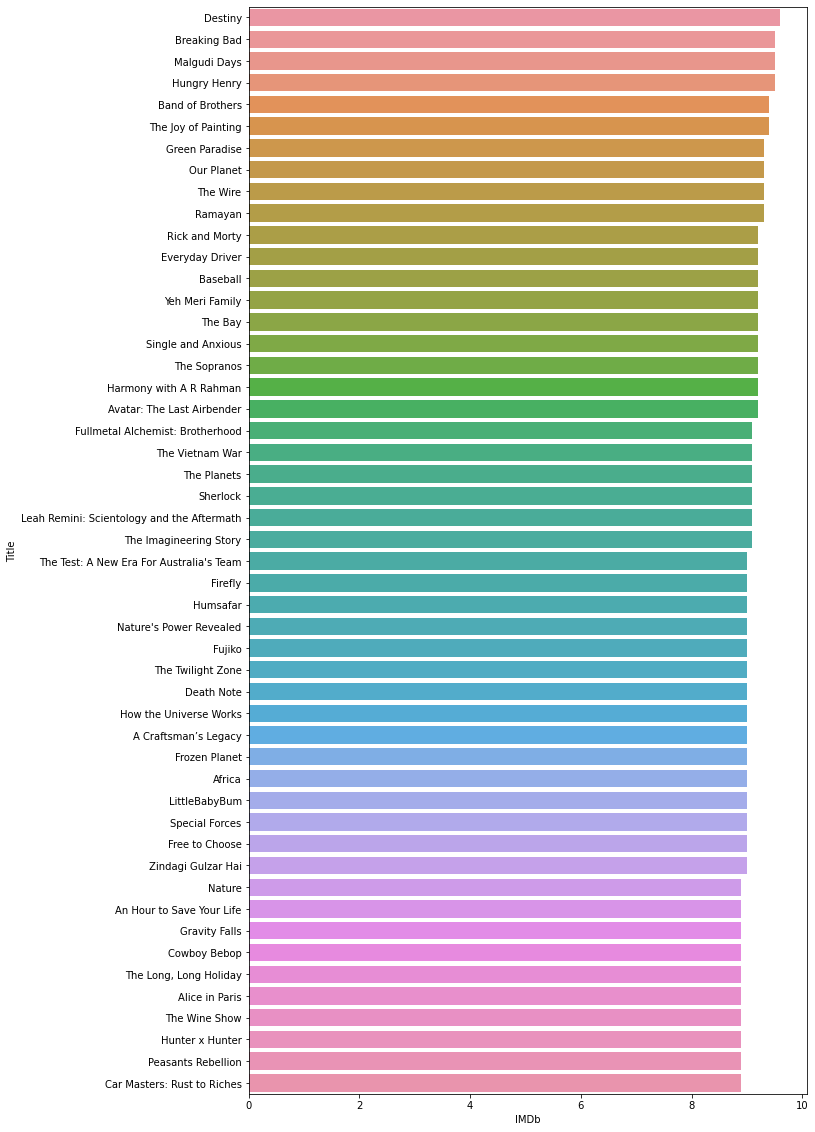

In [11]:
#top 50 IMDb rated  Tv shows
plt.subplots(figsize=(10,20))
sns.barplot(x="IMDb",y="Title",data=data.sort_values("IMDb",ascending=False).head(50))


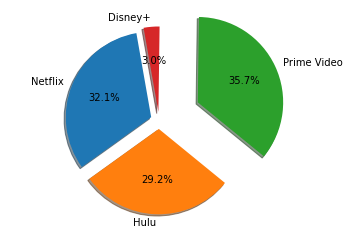

In [20]:
#quantity of shows on various platforms present in the dataset
labels = 'Netflix' , 'Hulu', 'Prime Video', 'Disney+'
sizes = [data['Netflix'].sum(),data['Hulu'].sum(),data['Prime Video'].sum(),data['Disney+'].sum()]
explode = (0.1, 0.1, 0.5, 0.1 )

fig1 , ax1 = plt.subplots()

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 100)

ax1.axis ('equal')
plt.show()



In [0]:
netflix_shows=data.loc[data['Netflix']==1]
hulu_shows=data.loc[data['Hulu']==1]
Prime_video_shows=data.loc[data['Prime Video']==1]
Disney_shows=data.loc[data['Disney+']==1]

In [0]:
#list of top shows on netflix
netflix_top_shows = netflix_shows.loc[netflix_shows['IMDb']>8.0]
hulu_top_shows = hulu_shows.loc[hulu_shows['IMDb']>8.0]
prime_video_top_shows = Prime_video_shows.loc[Prime_video_shows['IMDb']>8.0]
disney_top_shows = Disney_shows.loc[Disney_shows['IMDb']>8.0]

In [0]:
#lets plot a bar graph of platforms with highest IMDb shows

platform=['Netflix','Hulu','Prime Video','Disney+']
count=[netflix_top_shows['IMDb'].sum(),hulu_top_shows['IMDb'].sum(),prime_video_top_shows['IMDb'].sum(),disney_top_shows['IMDb'].sum()]

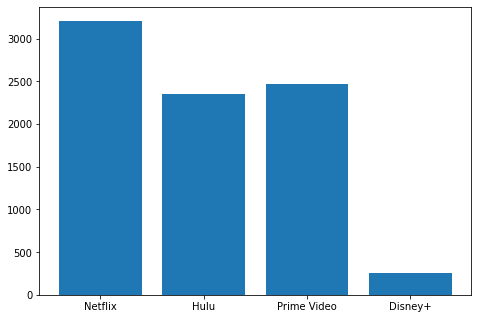

In [37]:
fig=plt.figure()
ax=fig.add_axes([1,1,1,1])
ax.bar(platform,count)
plt.show()

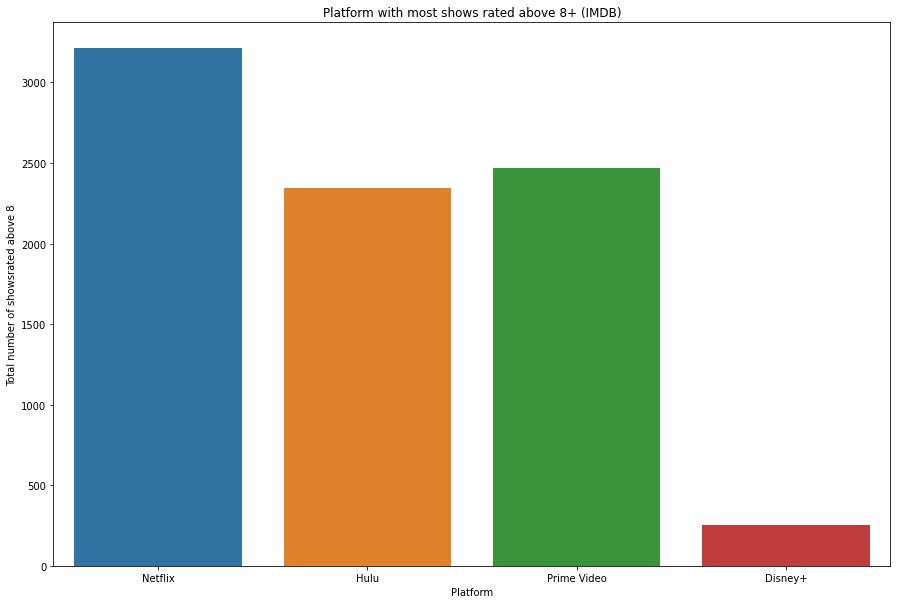

In [38]:
#Platform with most shows rated above 8+ (IMDB)
plt.figure(figsize = (15, 10))
sns.barplot(
           x = platform,
           y = count
)
plt.xlabel('Platform')
plt.ylabel('Total number of showsrated above 8')
plt.title('Platform with most shows rated above 8+ (IMDB)')
plt.show()